In [4]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Adjusting the Parent Data

In [5]:
startup = pd.read_csv("startup.csv")
startup.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed


In [6]:
# Dropping based on EDA
startup.drop(columns = ["has_roundA", "has_roundB", "has_roundC", "has_roundD", "is_CA", "is_NY", "is_MA", "is_TX", "is_otherstate", "has_VC", "has_angel"], inplace=True)
startup.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,0,0,0,0,0,1,c:6669,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,0,0,0,0,0,0,c:16283,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,0,0,0,0,0,0,c:65620,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,0,0,0,0,0,0,c:42668,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,0,1,0,0,0,0,c:65806,1.0000,1,closed


In [7]:
startup.columns

Index(['Unnamed: 0', 'state_code', 'latitude', 'longitude', 'zip_code', 'id',
       'city', 'Unnamed: 6', 'name', 'labels', 'founded_at', 'closed_at',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'state_code.1', 'category_code',
       'is_software', 'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'object_id', 'avg_participants', 'is_top500',
       'status'],
      dtype='object')

In [8]:
len(startup.columns)

38

# I suspect that "is_other_category" and "age_..." variables are all engineered features.

In [9]:
len(startup.columns)

38

# Looking at Raw Crunchbase Data

In [11]:
cb_companies = pd.read_csv("crunchbase-companies.csv", encoding = "latin")
cb_companies.head()

,permalink,name,category_code,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,last_milestone_at
0,/company/waywire,#waywire,news,1750000,operating,USA,NY,New York,New York,1,2012-06-01,2012-06,2012-Q2,2012.0,2012-06-30,2012-06-30,2013-09-06
1,/company/n-plusn,#NAME?,software,600000,operating,USA,NY,New York,New York,1,2012-01-01,2012-01,2012-Q1,2012.0,2012-08-29,2012-08-29,NaN
2,/company/club-domains,.Club Domains,software,7000000,operating,USA,FL,Fort Lauderdale,Oakland Park,1,2011-10-10,2011-10,2011-Q4,2011.0,2013-05-31,2013-05-31,NaN
3,/company/0xdata,0xdata,analytics,1700000,operating,USA,CA,SF Bay,Mountain View,1,NaN,NaN,NaN,NaN,2013-01-03,2013-01-03,2012-01-01
4,/company/1-800-dentist,1-800-DENTIST,health,NaN,operating,USA,CA,Los Angeles,Los Angeles,1,1986-01-01,1986-01,1986-Q1,1986.0,2010-08-19,2010-08-19,2010-08-19


In [12]:
cb_companies.columns

Index(['permalink', 'name', 'category_code', 'funding_total_usd', 'status',
       'country_code', 'state_code', 'region', 'city', 'funding_rounds',
       'founded_at', 'founded_month', 'founded_quarter', 'founded_year',
       'first_funding_at', 'last_funding_at', 'last_milestone_at'],
      dtype='object')

In [13]:
cb_companies = cb_companies.set_index("permalink")

In [14]:
cb_investments = pd.read_csv("crunchbase-investments.csv", encoding = "latin")
cb_investments.rename(columns = {"company_permalink": "permalink"}, inplace=True)
cb_investments = cb_investments.set_index("permalink")
cb_investments.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,company_name,company_category_code,company_country_code,company_state_code,company_region,company_city,investor_permalink,investor_name,investor_category_code,investor_country_code,investor_state_code,investor_region,investor_city,funding_round_type,funded_at,funded_month,funded_quarter,funded_year,raised_amount_usd
permalink,,,,,,,,,,,,,,,,,,,
/company/advercar,AdverCar,advertising,USA,CA,SF Bay,San Francisco,/company/1-800-flowers-com,1-800-FLOWERS.COM,NaN,USA,NY,New York,New York,series-a,2012-10-30,2012-10,2012-Q4,2012.0,2000000.0
/company/launchgram,LaunchGram,news,USA,CA,SF Bay,Mountain View,/company/10xelerator,10Xelerator,finance,USA,OH,Columbus,Columbus,other,2012-01-23,2012-01,2012-Q1,2012.0,20000.0
/company/utap,uTaP,messaging,USA,NaN,United States - Other,NaN,/company/10xelerator,10Xelerator,finance,USA,OH,Columbus,Columbus,other,2012-01-01,2012-01,2012-Q1,2012.0,20000.0
/company/zoopshop,ZoopShop,software,USA,OH,Columbus,columbus,/company/10xelerator,10Xelerator,finance,USA,OH,Columbus,Columbus,angel,2012-02-15,2012-02,2012-Q1,2012.0,20000.0
/company/efuneral,eFuneral,web,USA,OH,Cleveland,Cleveland,/company/10xelerator,10Xelerator,finance,USA,OH,Columbus,Columbus,other,2011-09-08,2011-09,2011-Q3,2011.0,20000.0


# Note that a company can get investments multiple times throughout its lifetime
- There will be duplicate entries, not sure how to deal with it yet

In [15]:
# Check overlap size
len(list(set(cb_investments.index)&set(cb_companies.index)))

11572

In [16]:
cb_investments.shape, cb_companies.shape

((52870, 19), (17727, 16))

In [17]:
cb_companies.join(cb_investments, how = "outer")

,name,category_code,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,...,investor_country_code,investor_state_code,investor_region,investor_city,funding_round_type,funded_at,funded_month,funded_quarter,funded_year,raised_amount_usd
permalink,,,,,,,,,,,,,,,,,,,,,
/company/0xdata,0xdata,analytics,1700000,operating,USA,CA,SF Bay,Mountain View,1.0,NaN,...,IND,NaN,Mumbai,Mumbai,venture,2013-01-03,2013-01,2013-Q1,2013.0,1700000.0
/company/1,One Inc.,mobile,1000050,operating,USA,CA,SF Bay,San Francisco,1.0,2011-08-01,...,USA,MA,Boston,Cambridge,angel,2011-07-20,2011-07,2011-Q3,2011.0,1000050.0
/company/1,One Inc.,mobile,1000050,operating,USA,CA,SF Bay,San Francisco,1.0,2011-08-01,...,USA,NY,unknown,Cambridge,angel,2011-07-20,2011-07,2011-Q3,2011.0,1000050.0
/company/1,One Inc.,mobile,1000050,operating,USA,CA,SF Bay,San Francisco,1.0,2011-08-01,...,USA,CA,SF Bay,San Francisco,angel,2011-07-20,2011-07,2011-Q3,2011.0,1000050.0
/company/1,One Inc.,mobile,1000050,operating,USA,CA,SF Bay,San Francisco,1.0,2011-08-01,...,USA,CA,SF Bay,Palo Alto,angel,2011-07-20,2011-07,2011-Q3,2011.0,1000050.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
/company/zyomyx-inc,ZYOMYX,biotech,26219999,operating,USA,NaN,SF Bay,Fremont,2.0,NaN,...,USA,NaN,Pittsburg,Canonsburg,series-b,2013-06-30,2013-06,2013-Q2,2013.0,12000000.0
/company/zypsee,Zypsee,transportation,1400000,operating,USA,CT,New York,Stamford,1.0,2011-01-01,...,USA,NY,New York,New York,angel,2013-08-13,2013-08,2013-Q3,2013.0,1400000.0
/company/zyrra,Zyrra,ecommerce,1460500,operating,USA,MA,Boston,Cambridge,3.0,NaN,...,USA,MA,Boston,Boston,angel,2010-11-15,2010-11,2010-Q4,2010.0,445000.0


In [18]:
cb_main = pd.merge(cb_companies, cb_investments, left_index = True, right_index = True)
cb_main.head()

,name,category_code,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,...,investor_country_code,investor_state_code,investor_region,investor_city,funding_round_type,funded_at,funded_month,funded_quarter,funded_year,raised_amount_usd
permalink,,,,,,,,,,,,,,,,,,,,,
/company/0xdata,0xdata,analytics,1700000,operating,USA,CA,SF Bay,Mountain View,1,NaN,...,IND,NaN,Mumbai,Mumbai,venture,2013-01-03,2013-01,2013-Q1,2013.0,1700000.0
/company/1,One Inc.,mobile,1000050,operating,USA,CA,SF Bay,San Francisco,1,2011-08-01,...,USA,MA,Boston,Cambridge,angel,2011-07-20,2011-07,2011-Q3,2011.0,1000050.0
/company/1,One Inc.,mobile,1000050,operating,USA,CA,SF Bay,San Francisco,1,2011-08-01,...,USA,NY,unknown,Cambridge,angel,2011-07-20,2011-07,2011-Q3,2011.0,1000050.0
/company/1,One Inc.,mobile,1000050,operating,USA,CA,SF Bay,San Francisco,1,2011-08-01,...,USA,CA,SF Bay,San Francisco,angel,2011-07-20,2011-07,2011-Q3,2011.0,1000050.0
/company/1,One Inc.,mobile,1000050,operating,USA,CA,SF Bay,San Francisco,1,2011-08-01,...,USA,CA,SF Bay,Palo Alto,angel,2011-07-20,2011-07,2011-Q3,2011.0,1000050.0


In [19]:
cb_main.isna().sum()

name                          0
category_code               642
funding_total_usd          2088
status                        0
country_code                  0
state_code                  491
region                        0
city                        532
funding_rounds                0
founded_at                 7644
founded_month              7644
founded_quarter            7644
founded_year               7644
first_funding_at              0
last_funding_at               0
last_milestone_at         10143
company_name                  0
company_category_code       642
company_country_code          0
company_state_code          491
company_region                0
company_city                532
investor_permalink            0
investor_name                 0
investor_category_code    50425
investor_country_code     11999
investor_state_code       16807
investor_region               0
investor_city             12478
funding_round_type            1
funded_at                     1
funded_m

In [20]:
cb_main.shape

(52868, 35)

In [21]:
parent_col = ["name", "state_code", "city", "founded_at", "closed_at", "first_funding_at", "last_funding_at", "relationships", "funding_rounds", "funding_total_usd", "milestones", "category_code", "status"]


In [22]:
cb_main[parent_col]

KeyError: "['closed_at', 'relationships', 'milestones'] not in index"

closed_at is a redundant variable to include in a model. If a company has a closed_at date, it has obviously already failed.

relationships and milestones might have to be dropped just to reach a compromise for data merging purposes

In [23]:
unwanted_features = ["closed_at", "relationships", "milestones"]
parent_col2 = [x for x in parent_col if x not in unwanted_features]
parent_col2

['name',
 'state_code',
 'city',
 'founded_at',
 'first_funding_at',
 'last_funding_at',
 'funding_rounds',
 'funding_total_usd',
 'category_code',
 'status']

In [24]:
cb_main[parent_col2]

,name,state_code,city,founded_at,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,category_code,status
permalink,,,,,,,,,,
/company/0xdata,0xdata,CA,Mountain View,NaN,2013-01-03,2013-01-03,1,1700000,analytics,operating
/company/1,One Inc.,CA,San Francisco,2011-08-01,2011-07-20,2011-07-20,1,1000050,mobile,operating
/company/1,One Inc.,CA,San Francisco,2011-08-01,2011-07-20,2011-07-20,1,1000050,mobile,operating
/company/1,One Inc.,CA,San Francisco,2011-08-01,2011-07-20,2011-07-20,1,1000050,mobile,operating
/company/1,One Inc.,CA,San Francisco,2011-08-01,2011-07-20,2011-07-20,1,1000050,mobile,operating
...,...,...,...,...,...,...,...,...,...,...
/company/zyngenia,Zyngenia,MD,Gaithersburg,2008-01-01,2010-09-09,2010-09-09,1,25000000,biotech,operating
/company/zyomyx-inc,ZYOMYX,NaN,Fremont,NaN,2013-06-30,2013-07-11,2,26219999,biotech,operating
/company/zyomyx-inc,ZYOMYX,NaN,Fremont,NaN,2013-06-30,2013-07-11,2,26219999,biotech,operating


In [25]:
cb_main["category_code1"] = cb_main["category_code"]
cb_main_dum = pd.get_dummies(cb_main, columns = ["category_code1"], prefix = "is")
cb_main_dum

,name,category_code,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,...,is_real_estate,is_search,is_security,is_semiconductor,is_social,is_software,is_sports,is_transportation,is_travel,is_web
permalink,,,,,,,,,,,,,,,,,,,,,
/company/0xdata,0xdata,analytics,1700000,operating,USA,CA,SF Bay,Mountain View,1,NaN,...,0,0,0,0,0,0,0,0,0,0
/company/1,One Inc.,mobile,1000050,operating,USA,CA,SF Bay,San Francisco,1,2011-08-01,...,0,0,0,0,0,0,0,0,0,0
/company/1,One Inc.,mobile,1000050,operating,USA,CA,SF Bay,San Francisco,1,2011-08-01,...,0,0,0,0,0,0,0,0,0,0
/company/1,One Inc.,mobile,1000050,operating,USA,CA,SF Bay,San Francisco,1,2011-08-01,...,0,0,0,0,0,0,0,0,0,0
/company/1,One Inc.,mobile,1000050,operating,USA,CA,SF Bay,San Francisco,1,2011-08-01,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
/company/zyngenia,Zyngenia,biotech,25000000,operating,USA,MD,Washington DC,Gaithersburg,1,2008-01-01,...,0,0,0,0,0,0,0,0,0,0
/company/zyomyx-inc,ZYOMYX,biotech,26219999,operating,USA,NaN,SF Bay,Fremont,2,NaN,...,0,0,0,0,0,0,0,0,0,0
/company/zyomyx-inc,ZYOMYX,biotech,26219999,operating,USA,NaN,SF Bay,Fremont,2,NaN,...,0,0,0,0,0,0,0,0,0,0


In [26]:
parent_col2.extend(['is_software', 'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_games_video', 'is_ecommerce', 'is_biotech', 'is_consulting'])

cb_main2 = cb_main_dum[parent_col2]
cb_main2

,name,state_code,city,founded_at,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,category_code,status,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_games_video,is_ecommerce,is_biotech,is_consulting
permalink,,,,,,,,,,,,,,,,,,,
/company/0xdata,0xdata,CA,Mountain View,NaN,2013-01-03,2013-01-03,1,1700000,analytics,operating,0,0,0,0,0,0,0,0,0
/company/1,One Inc.,CA,San Francisco,2011-08-01,2011-07-20,2011-07-20,1,1000050,mobile,operating,0,0,1,0,0,0,0,0,0
/company/1,One Inc.,CA,San Francisco,2011-08-01,2011-07-20,2011-07-20,1,1000050,mobile,operating,0,0,1,0,0,0,0,0,0
/company/1,One Inc.,CA,San Francisco,2011-08-01,2011-07-20,2011-07-20,1,1000050,mobile,operating,0,0,1,0,0,0,0,0,0
/company/1,One Inc.,CA,San Francisco,2011-08-01,2011-07-20,2011-07-20,1,1000050,mobile,operating,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
/company/zyngenia,Zyngenia,MD,Gaithersburg,2008-01-01,2010-09-09,2010-09-09,1,25000000,biotech,operating,0,0,0,0,0,0,0,1,0
/company/zyomyx-inc,ZYOMYX,NaN,Fremont,NaN,2013-06-30,2013-07-11,2,26219999,biotech,operating,0,0,0,0,0,0,0,1,0
/company/zyomyx-inc,ZYOMYX,NaN,Fremont,NaN,2013-06-30,2013-07-11,2,26219999,biotech,operating,0,0,0,0,0,0,0,1,0


In [27]:
cat_list = ['software', 'web', 'mobile', 'enterprise', 'advertising',
       'games_video', 'ecommerce', 'biotech', 'consulting']

In [28]:
cb_main3 = cb_main2.copy()
cb_main3["is_othercategory"] = (~cb_main2["category_code"].isin(cat_list)) *1

cb_main3

,name,state_code,city,founded_at,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,category_code,status,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_games_video,is_ecommerce,is_biotech,is_consulting,is_othercategory
permalink,,,,,,,,,,,,,,,,,,,,
/company/0xdata,0xdata,CA,Mountain View,NaN,2013-01-03,2013-01-03,1,1700000,analytics,operating,0,0,0,0,0,0,0,0,0,1
/company/1,One Inc.,CA,San Francisco,2011-08-01,2011-07-20,2011-07-20,1,1000050,mobile,operating,0,0,1,0,0,0,0,0,0,0
/company/1,One Inc.,CA,San Francisco,2011-08-01,2011-07-20,2011-07-20,1,1000050,mobile,operating,0,0,1,0,0,0,0,0,0,0
/company/1,One Inc.,CA,San Francisco,2011-08-01,2011-07-20,2011-07-20,1,1000050,mobile,operating,0,0,1,0,0,0,0,0,0,0
/company/1,One Inc.,CA,San Francisco,2011-08-01,2011-07-20,2011-07-20,1,1000050,mobile,operating,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
/company/zyngenia,Zyngenia,MD,Gaithersburg,2008-01-01,2010-09-09,2010-09-09,1,25000000,biotech,operating,0,0,0,0,0,0,0,1,0,0
/company/zyomyx-inc,ZYOMYX,NaN,Fremont,NaN,2013-06-30,2013-07-11,2,26219999,biotech,operating,0,0,0,0,0,0,0,1,0,0
/company/zyomyx-inc,ZYOMYX,NaN,Fremont,NaN,2013-06-30,2013-07-11,2,26219999,biotech,operating,0,0,0,0,0,0,0,1,0,0


In [29]:
cb_main3.columns

Index(['name', 'state_code', 'city', 'founded_at', 'first_funding_at',
       'last_funding_at', 'funding_rounds', 'funding_total_usd',
       'category_code', 'status', 'is_software', 'is_web', 'is_mobile',
       'is_enterprise', 'is_advertising', 'is_games_video', 'is_ecommerce',
       'is_biotech', 'is_consulting', 'is_othercategory'],
      dtype='object')

In [30]:
# Renaming columns to fit the parent dataframe
cb_main3.rename(columns = {"is_games_video": "is_gamesvideo",
                }, inplace=True)

In [31]:
cb_main3.head()

,name,state_code,city,founded_at,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,category_code,status,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory
permalink,,,,,,,,,,,,,,,,,,,,
/company/0xdata,0xdata,CA,Mountain View,NaN,2013-01-03,2013-01-03,1,1700000,analytics,operating,0,0,0,0,0,0,0,0,0,1
/company/1,One Inc.,CA,San Francisco,2011-08-01,2011-07-20,2011-07-20,1,1000050,mobile,operating,0,0,1,0,0,0,0,0,0,0
/company/1,One Inc.,CA,San Francisco,2011-08-01,2011-07-20,2011-07-20,1,1000050,mobile,operating,0,0,1,0,0,0,0,0,0,0
/company/1,One Inc.,CA,San Francisco,2011-08-01,2011-07-20,2011-07-20,1,1000050,mobile,operating,0,0,1,0,0,0,0,0,0,0
/company/1,One Inc.,CA,San Francisco,2011-08-01,2011-07-20,2011-07-20,1,1000050,mobile,operating,0,0,1,0,0,0,0,0,0,0


# Addressing Missing Values

In [32]:
cb_main3.isna().sum()

name                    0
state_code            491
city                  532
founded_at           7644
first_funding_at        0
last_funding_at         0
funding_rounds          0
funding_total_usd    2088
category_code         642
status                  0
is_software             0
is_web                  0
is_mobile               0
is_enterprise           0
is_advertising          0
is_gamesvideo           0
is_ecommerce            0
is_biotech              0
is_consulting           0
is_othercategory        0
dtype: int64

In [33]:
cb_main3.shape

(52868, 20)

In [34]:
cb_main3.dropna(axis = 0, inplace=True)

In [35]:
cb_main3.shape

(42802, 20)

# Merging the Data Sets

In [36]:
parent_col2.extend(["is_othercategory"])

parent_col2 = ["is_gamesvideo" if x  == "is_games_video" else x for x in parent_col2]
parent_col2

['name',
 'state_code',
 'city',
 'founded_at',
 'first_funding_at',
 'last_funding_at',
 'funding_rounds',
 'funding_total_usd',
 'category_code',
 'status',
 'is_software',
 'is_web',
 'is_mobile',
 'is_enterprise',
 'is_advertising',
 'is_gamesvideo',
 'is_ecommerce',
 'is_biotech',
 'is_consulting',
 'is_othercategory']

In [37]:
startup[parent_col2].isna().sum()

name                 0
state_code           0
city                 0
founded_at           0
first_funding_at     0
last_funding_at      0
funding_rounds       0
funding_total_usd    0
category_code        0
status               0
is_software          0
is_web               0
is_mobile            0
is_enterprise        0
is_advertising       0
is_gamesvideo        0
is_ecommerce         0
is_biotech           0
is_consulting        0
is_othercategory     0
dtype: int64

In [38]:
cb_main3.isna().sum()

name                 0
state_code           0
city                 0
founded_at           0
first_funding_at     0
last_funding_at      0
funding_rounds       0
funding_total_usd    0
category_code        0
status               0
is_software          0
is_web               0
is_mobile            0
is_enterprise        0
is_advertising       0
is_gamesvideo        0
is_ecommerce         0
is_biotech           0
is_consulting        0
is_othercategory     0
dtype: int64

In [39]:
main_df = pd.concat([cb_main3,startup[parent_col2]])
main_df

,name,state_code,city,founded_at,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,category_code,status,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory
/company/1,One Inc.,CA,San Francisco,2011-08-01,2011-07-20,2011-07-20,1,1000050,mobile,operating,0,0,1,0,0,0,0,0,0,0
/company/1,One Inc.,CA,San Francisco,2011-08-01,2011-07-20,2011-07-20,1,1000050,mobile,operating,0,0,1,0,0,0,0,0,0,0
/company/1,One Inc.,CA,San Francisco,2011-08-01,2011-07-20,2011-07-20,1,1000050,mobile,operating,0,0,1,0,0,0,0,0,0,0
/company/1,One Inc.,CA,San Francisco,2011-08-01,2011-07-20,2011-07-20,1,1000050,mobile,operating,0,0,1,0,0,0,0,0,0,0
/company/1,One Inc.,CA,San Francisco,2011-08-01,2011-07-20,2011-07-20,1,1000050,mobile,operating,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,CoTweet,CA,San Francisco,1/1/2009,7/9/2009,7/9/2009,1,1100000,advertising,acquired,0,0,0,0,1,0,0,0,0,0
919,Reef Point Systems,MA,Burlington,1/1/1998,4/1/2005,3/23/2007,3,52000000,security,closed,0,0,0,0,0,0,0,0,0,1
920,Paracor Medical,CA,Sunnyvale,1/1/1999,6/29/2007,6/29/2007,1,44000000,biotech,closed,0,0,0,0,0,0,0,1,0,0
921,Causata,CA,San Francisco,1/1/2009,10/5/2009,11/1/2011,2,15500000,software,acquired,1,0,0,0,0,0,0,0,0,0


In [40]:
main_df.isna().sum()

name                 0
state_code           0
city                 0
founded_at           0
first_funding_at     0
last_funding_at      0
funding_rounds       0
funding_total_usd    0
category_code        0
status               0
is_software          0
is_web               0
is_mobile            0
is_enterprise        0
is_advertising       0
is_gamesvideo        0
is_ecommerce         0
is_biotech           0
is_consulting        0
is_othercategory     0
dtype: int64

In [41]:
main_df.columns

Index(['name', 'state_code', 'city', 'founded_at', 'first_funding_at',
       'last_funding_at', 'funding_rounds', 'funding_total_usd',
       'category_code', 'status', 'is_software', 'is_web', 'is_mobile',
       'is_enterprise', 'is_advertising', 'is_gamesvideo', 'is_ecommerce',
       'is_biotech', 'is_consulting', 'is_othercategory'],
      dtype='object')

In [42]:
main_df.sort_values("name", inplace=True)

In [43]:
main_df.drop_duplicates(subset = "name", ignore_index = True, keep = "last", inplace=True)
main_df

,name,state_code,city,founded_at,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,category_code,status,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory
0,#waywire,NY,New York,2012-06-01,2012-06-30,2012-06-30,1,1750000,news,operating,0,0,0,0,0,0,0,0,0,1
1,1000memories,CA,San Francisco,2010-07-01,2010-01-01,2011-02-16,2,2535000,web,acquired,0,1,0,0,0,0,0,0,0,0
2,100Plus,CA,San Francisco,2011-09-16,2011-11-02,2011-11-30,2,1250000,analytics,acquired,0,0,0,0,0,0,0,0,0,1
3,1010data,NY,New York,2000-01-01,2010-03-08,2010-03-08,1,35000000,software,operating,1,0,0,0,0,0,0,0,0,0
4,121nexus,RI,Providence,2011-10-07,2012-02-06,2013-07-01,4,719000,software,operating,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8064,y prime,PA,Malvern,2006-01-01,2013-09-07,2013-09-07,1,5000000,health,operating,0,0,0,0,0,0,0,0,0,1
8065,yaM Labs,VA,Alexandria,2009-12-03,2011-03-02,2011-03-02,1,500000,software,operating,1,0,0,0,0,0,0,0,0,0
8066,ybuy,CA,Beverly Hills,2011-08-01,2012-01-17,2012-07-05,2,1750000,web,operating,0,1,0,0,0,0,0,0,0,0
8067,zozi,CA,San Francisco,2007-01-01,2008-08-01,2013-04-04,4,21300000,ecommerce,operating,0,0,0,0,0,0,1,0,0,0


In [44]:
main_df["status"].unique()

array(['operating', 'acquired', 'closed', 'ipo'], dtype=object)

## To perform the merging:
- I had to identify the common columns that could be found in the uncleaned crunchbase data. See main_df.columns
    - The columns that are notably left out are: relationships, milestones, age_first_funding_years, age_last_funding_years, is_top500
        - We can engineer our own age variables if we choose.
    - The other useless columns like state_code, latitude, longitude, zip_code are not worth noting because they shouldn't be part of the model anyway. We have the state_code, which should imply we don't need further granularity for location.

- The uncleaned crunchbase data is merged using crunchbase-companies.csv and crunchbase-investments.csv. Note: There are duplicate entries for crunchbase-investments.csv, since one company can receive multiple investments.
    - After merging and creating dummies, I sort by name and drop all duplicated rows, losing information about repeated investments in the process.

# Converting Data Types
- founded_at, first_funding_at, last_funding_at should be datetime
- funding_total_usd shold be int64

In [45]:
main_df.dtypes

name                 object
state_code           object
city                 object
founded_at           object
first_funding_at     object
last_funding_at      object
funding_rounds        int64
funding_total_usd    object
category_code        object
status               object
is_software           int64
is_web                int64
is_mobile             int64
is_enterprise         int64
is_advertising        int64
is_gamesvideo         int64
is_ecommerce          int64
is_biotech            int64
is_consulting         int64
is_othercategory      int64
dtype: object

In [46]:
# Checking the number of invalid entries under funding_total_usd

sum(pd.to_numeric(main_df["funding_total_usd"], errors = "coerce").isnull())

5

In [47]:
# Checking the number of invalid entries under funding_total_usd

funding_errors = pd.to_numeric(main_df["funding_total_usd"], errors = "coerce")
sum(funding_errors.isna())

5

In [48]:
# Removing errors in funding_total_usd using boolean index
funding_errors_idx = funding_errors.isna()
main_df[funding_errors_idx]

,name,state_code,city,founded_at,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,category_code,status,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory
3318,Involution Studios,MA,Arlington,2004-06-29,2004-06-01,2004-06-01,1,5/18/27,consulting,operating,0,0,0,0,0,0,0,0,1,0
3579,Lambda OpticalSystems,VA,Reston,2000-01-01,2005-09-27,2005-09-27,1,10/23/75,public_relations,operating,0,0,0,0,0,0,0,0,0,1
3940,Marketcetera,CA,San Francisco,2006-01-01,2008-06-05,2008-06-05,1,##############################################...,software,operating,1,0,0,0,0,0,0,0,0,0
3947,Marrone Bio Innovations,CA,Davis,2006-01-01,2011-06-01,2012-04-20,2,##############################################...,biotech,ipo,0,0,0,0,0,0,0,1,0,0
4616,OnGreen,CA,Los Angeles,2009-09-10,2010-11-09,2010-11-09,1,1/24/33,cleantech,operating,0,0,0,0,0,0,0,0,0,1


In [49]:
main_df.shape

(8069, 20)

In [50]:
main_df.drop(main_df.index[[3318, 3579, 3940, 3947, 4616]], inplace=True)
main_df.shape

(8064, 20)

In [51]:
main_df["funding_total_usd"] = main_df["funding_total_usd"].astype("int64")
for x in ["founded_at", "first_funding_at", "last_funding_at"]:
    main_df[x] = pd.to_datetime(main_df[x])

In [52]:
main_df.dtypes

name                         object
state_code                   object
city                         object
founded_at           datetime64[ns]
first_funding_at     datetime64[ns]
last_funding_at      datetime64[ns]
funding_rounds                int64
funding_total_usd             int64
category_code                object
status                       object
is_software                   int64
is_web                        int64
is_mobile                     int64
is_enterprise                 int64
is_advertising                int64
is_gamesvideo                 int64
is_ecommerce                  int64
is_biotech                    int64
is_consulting                 int64
is_othercategory              int64
dtype: object

# Engineering Variables
- months_to_first_funding, months_to_last_funding
- label: Success or Failure
    - We define success as either being acquired, ipo, or operating with a certain funding_total_usd threshold
        - The funding_total_usd threshold is taken as the 50% percentile of the startups which are still operating

In [53]:
main_df["months_to_first_funding"] =  abs(main_df["first_funding_at"].dt.to_period("M").view(dtype="int64") - main_df["founded_at"].dt.to_period("M").view(dtype = "int64"))
main_df["months_to_last_funding"] = abs(main_df["last_funding_at"].dt.to_period("M").view(dtype ="int64") - main_df["founded_at"].dt.to_period("M").view(dtype = "int64"))
main_df

,name,state_code,city,founded_at,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,category_code,status,...,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,months_to_first_funding,months_to_last_funding
0,#waywire,NY,New York,2012-06-01,2012-06-30,2012-06-30,1,1750000,news,operating,...,0,0,0,0,0,0,0,1,0,0
1,1000memories,CA,San Francisco,2010-07-01,2010-01-01,2011-02-16,2,2535000,web,acquired,...,0,0,0,0,0,0,0,0,6,7
2,100Plus,CA,San Francisco,2011-09-16,2011-11-02,2011-11-30,2,1250000,analytics,acquired,...,0,0,0,0,0,0,0,1,2,2
3,1010data,NY,New York,2000-01-01,2010-03-08,2010-03-08,1,35000000,software,operating,...,0,0,0,0,0,0,0,0,122,122
4,121nexus,RI,Providence,2011-10-07,2012-02-06,2013-07-01,4,719000,software,operating,...,0,0,0,0,0,0,0,0,4,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8064,y prime,PA,Malvern,2006-01-01,2013-09-07,2013-09-07,1,5000000,health,operating,...,0,0,0,0,0,0,0,1,92,92
8065,yaM Labs,VA,Alexandria,2009-12-03,2011-03-02,2011-03-02,1,500000,software,operating,...,0,0,0,0,0,0,0,0,15,15
8066,ybuy,CA,Beverly Hills,2011-08-01,2012-01-17,2012-07-05,2,1750000,web,operating,...,0,0,0,0,0,0,0,0,5,11
8067,zozi,CA,San Francisco,2007-01-01,2008-08-01,2013-04-04,4,21300000,ecommerce,operating,...,0,0,0,0,1,0,0,0,19,75


In [54]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)
main_df.loc[main_df["status"] == "operating"]["funding_total_usd"].describe()

count         6498
mean      22420163
std       62409613
min           1000
25%        1700000
50%        7537502
75%       23895000
max     2600000000
Name: funding_total_usd, dtype: float64

## We take absolute values for months_to_first_funding and months_to_last_funding to account for the fact that there might be startups who get funding before they officially get founded (e.g. from pitching an idea to VCs, winning competitions, etc)
- Remove the negative number interpretation for months

### Creating label variable

In [55]:
main_df["label"] = "Success"
main_df.loc[((main_df["status"] == "operating") & (main_df["funding_total_usd"]< 7537502)) | (main_df["status"] == "closed"), "label"] = "Failure"

In [56]:
main_df

,name,state_code,city,founded_at,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,category_code,status,...,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,months_to_first_funding,months_to_last_funding,label
0,#waywire,NY,New York,2012-06-01,2012-06-30,2012-06-30,1,1750000,news,operating,...,0,0,0,0,0,0,1,0,0,Failure
1,1000memories,CA,San Francisco,2010-07-01,2010-01-01,2011-02-16,2,2535000,web,acquired,...,0,0,0,0,0,0,0,6,7,Success
2,100Plus,CA,San Francisco,2011-09-16,2011-11-02,2011-11-30,2,1250000,analytics,acquired,...,0,0,0,0,0,0,1,2,2,Success
3,1010data,NY,New York,2000-01-01,2010-03-08,2010-03-08,1,35000000,software,operating,...,0,0,0,0,0,0,0,122,122,Success
4,121nexus,RI,Providence,2011-10-07,2012-02-06,2013-07-01,4,719000,software,operating,...,0,0,0,0,0,0,0,4,21,Failure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8064,y prime,PA,Malvern,2006-01-01,2013-09-07,2013-09-07,1,5000000,health,operating,...,0,0,0,0,0,0,1,92,92,Failure
8065,yaM Labs,VA,Alexandria,2009-12-03,2011-03-02,2011-03-02,1,500000,software,operating,...,0,0,0,0,0,0,0,15,15,Failure
8066,ybuy,CA,Beverly Hills,2011-08-01,2012-01-17,2012-07-05,2,1750000,web,operating,...,0,0,0,0,0,0,0,5,11,Failure
8067,zozi,CA,San Francisco,2007-01-01,2008-08-01,2013-04-04,4,21300000,ecommerce,operating,...,0,0,0,1,0,0,0,19,75,Success


<AxesSubplot:>

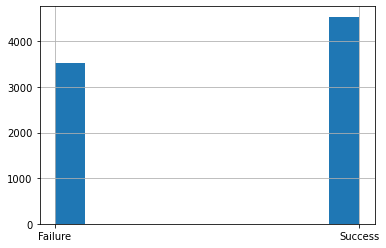

In [57]:
main_df["label"].hist()